In [6]:
import requests

In [7]:
from bs4 import BeautifulSoup

In [8]:
base_site = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"

response = requests.get(base_site)
response

<Response [200]>

In [9]:
html = response.content

In [10]:
soup = BeautifulSoup(html , 'html.parser')

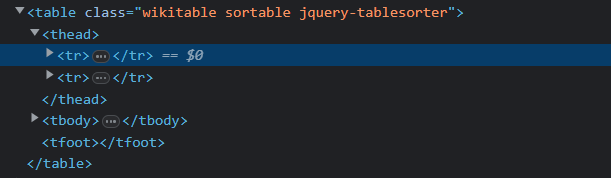

In [14]:
table = soup.find(class_ = "wikitable")
table

<table class="wikitable sortable">
<tbody><tr>
<th rowspan="2">Rank</th>
<th rowspan="2"><a href="/wiki/List_of_sovereign_states" title="List of sovereign states">Country</a> / <a href="/wiki/Dependent_territory" title="Dependent territory">Dependency</a></th>
<th colspan="2">Population</th>
<th rowspan="2">Date</th>
<th rowspan="2"><span class="nowrap">Source (official or from</span> the <a href="/wiki/United_Nations" title="United Nations">United Nations</a>)</th>
<th class="unsortable" rowspan="2">Notes
</th></tr>
<tr>
<th>Numbers</th>
<th>% of the world
</th></tr>
<tr>
<td style="text-align:center"><b>–</b>
</td>
<td><b>World</b>
</td>
<td style="text-align:center"><b> 8,013,172,000</b></td>
<td style="text-align:right"><b>100%</b></td>
<td><b><span data-sort-value="000000002023-02-17-0000" style="white-space:nowrap">17 Feb 2023</span></b></td>
<td style="text-align:left"><b>UN projection<sup class="reference" id="cite_ref-unpop_4-0"><a href="#cite_note-unpop-4">[3]</a></sup></b></

In [15]:
table_rows = table.find_all('tr')
table_rows

[<tr>
 <th rowspan="2">Rank</th>
 <th rowspan="2"><a href="/wiki/List_of_sovereign_states" title="List of sovereign states">Country</a> / <a href="/wiki/Dependent_territory" title="Dependent territory">Dependency</a></th>
 <th colspan="2">Population</th>
 <th rowspan="2">Date</th>
 <th rowspan="2"><span class="nowrap">Source (official or from</span> the <a href="/wiki/United_Nations" title="United Nations">United Nations</a>)</th>
 <th class="unsortable" rowspan="2">Notes
 </th></tr>,
 <tr>
 <th>Numbers</th>
 <th>% of the world
 </th></tr>,
 <tr>
 <td style="text-align:center"><b>–</b>
 </td>
 <td><b>World</b>
 </td>
 <td style="text-align:center"><b> 8,013,172,000</b></td>
 <td style="text-align:right"><b>100%</b></td>
 <td><b><span data-sort-value="000000002023-02-17-0000" style="white-space:nowrap">17 Feb 2023</span></b></td>
 <td style="text-align:left"><b>UN projection<sup class="reference" id="cite_ref-unpop_4-0"><a href="#cite_note-unpop-4">[3]</a></sup></b></td>
 <td>
 </td></t

In [18]:
table_rows = table.find_all('tr')
table_rows = table_rows[3:]

In [19]:
table_rows

[<tr>
 <th>1
 </th>
 <td scope="row" style="text-align:left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/23px-Flag_of_the_People%27s_Republic_of_China.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/35px-Flag_of_the_People%27s_Republic_of_China.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/45px-Flag_of_the_People%27s_Republic_of_China.svg.png 2x" width="23"/></span> <a href="/wiki/Demographics_of_China" title="Demographics of China">China</a></td>
 <td style="text-align:right">1,411,750,000</td>
 <td style="text-align:right;font-size:inherit"><span data-sort-value="7,001,176,178,671,817,000♠" style="display:none"></span>17.6%
 </td>
 <td><span data-sort-value="000000002022-

### Scrapping Rank

In [23]:
for row in table_rows[:3]:
    
    rank = row.find('th')
    #print(rank.text)
    rank = rank.text
    rank = rank.strip()
    
    print(rank)

1
2
3


### Scrapping Non Headers

In [27]:
for row in table_rows[:3]:
    
    rank = row.find('th')
    #print(rank.text)
    rank = rank.text
    rank = rank.strip()
    
    non_headers = row.find_all('td')
    
    #print(non_headers[0].text)
    
    name = non_headers[0].text
    print(name)

 China
 India
 United States


In [39]:
for row in table_rows[:3]:
    
    rank = row.find('th')
    rank = rank.text
    rank = rank.strip()
    
    non_headers = row.find_all('td')
    
    name = non_headers[0].text.strip()
    pop = non_headers[1].text.strip()
    per = non_headers[2].text.strip()
    date = non_headers[3].text.strip()
    source = non_headers[4].text.strip()[:-3]
    
    print(source)
    
    

Official estimate
Official projection
National population clock


In [42]:
whole_table = []

for row in table_rows[:3]:
    
    rank = row.find('th')
    rank = rank.text
    rank = rank.strip()
    
    non_headers = row.find_all('td')
    
    name = non_headers[0].text.strip()
    pop = non_headers[1].text.strip()
    per = non_headers[2].text.strip()
    date = non_headers[3].text.strip()
    source = non_headers[4].text.strip()[:-3]
    
    whole_table.append([rank,name,pop,per,date,source])
    

In [43]:
whole_table

[['1', 'China', '1,411,750,000', '17.6%', '31 Dec 2022', 'Official estimate'],
 ['2', 'India', '1,375,586,000', '17.2%', '1 Mar 2022', 'Official projection'],
 ['3',
  'United States',
  '334,390,970',
  '4.17%',
  '16 Feb 2023',
  'National population clock']]

In [45]:
import pandas as pd
pd.DataFrame(data = whole_table , columns = ["rank","name","pop","per","date","source"])

,rank,name,pop,per,date,source
0,1,China,"1,411,750,000",17.6%,31 Dec 2022,Official estimate
1,2,India,"1,375,586,000",17.2%,1 Mar 2022,Official projection
2,3,United States,"334,390,970",4.17%,16 Feb 2023,National population clock
